In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customers/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# There is one column 'Genre' incorrectly named
# Renaming it to 'Gender'

df.rename(columns={'Genre':'Gender'}, inplace=True)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Exploratory Data Analysis(EDA)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.duplicated().any()

False

<Axes: >

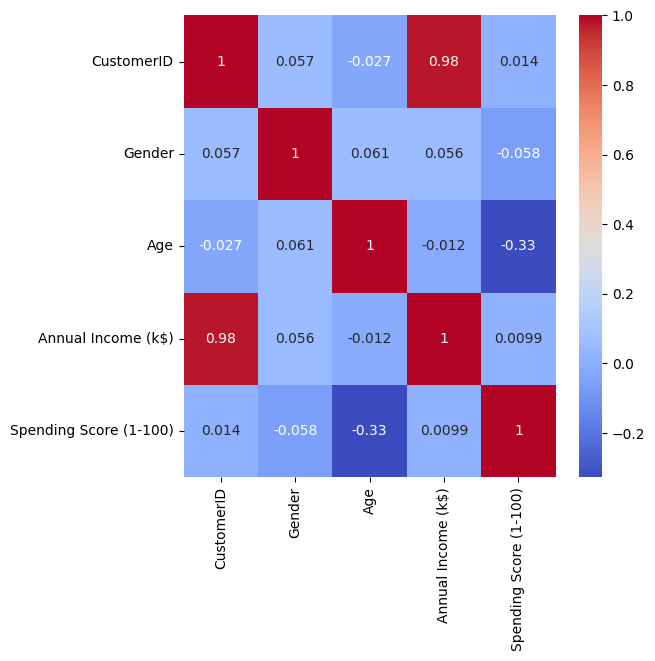

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Correlation Matrix
df_for_corr = df.copy()
df_for_corr['Gender'] = labelencoder.fit_transform(df_for_corr['Gender'])

corr = df_for_corr.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [13]:
df_for_corr.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

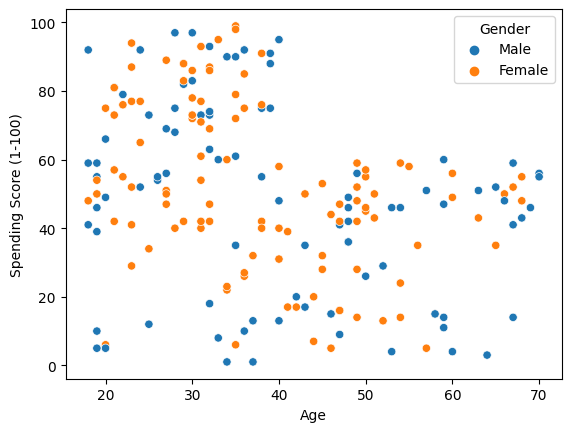

In [15]:
# Age and Spending Score have strong correlation, so getting a scatterplot between them.
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

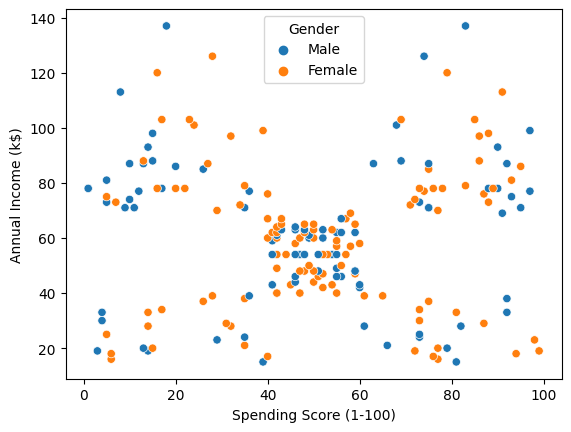

In [16]:
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender')

<Axes: >

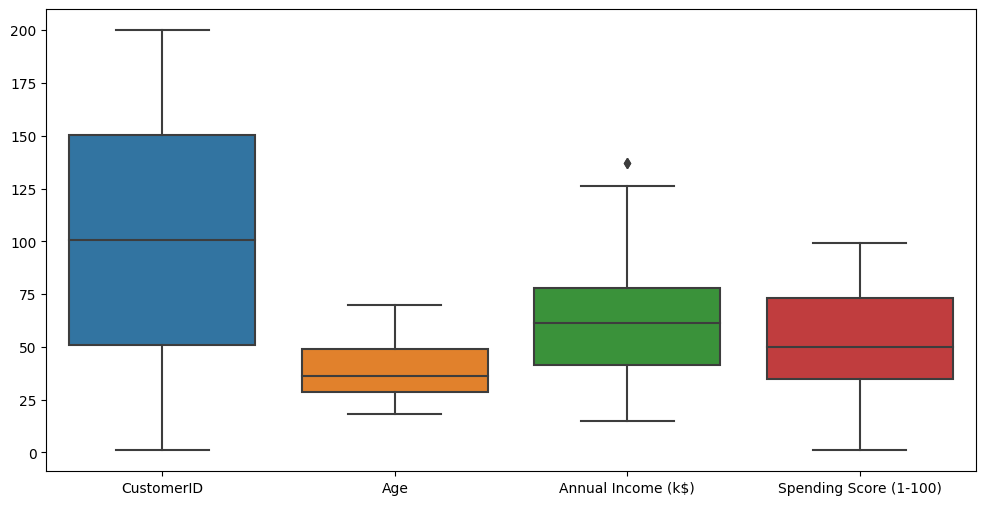

In [17]:
# Increase the size of the figure
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

sns.boxplot(data = df)

In [18]:
# From the above boxplot, we can see 'Annual Income' column has some outliers.
# To remove these outliers, I am writing a function for IQR.

def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]

df_no_outliers = remove_outliers(df, 'Annual Income (k$)')

<Axes: xlabel='Annual Income (k$)'>

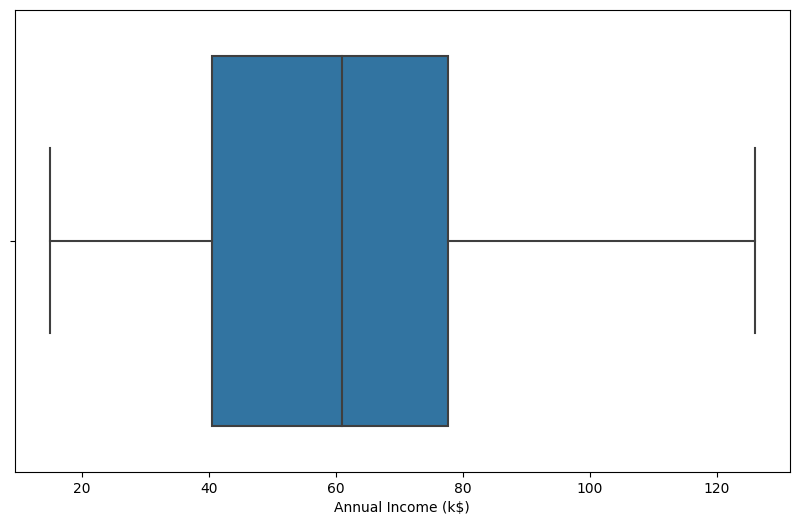

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Annual Income (k$)'])

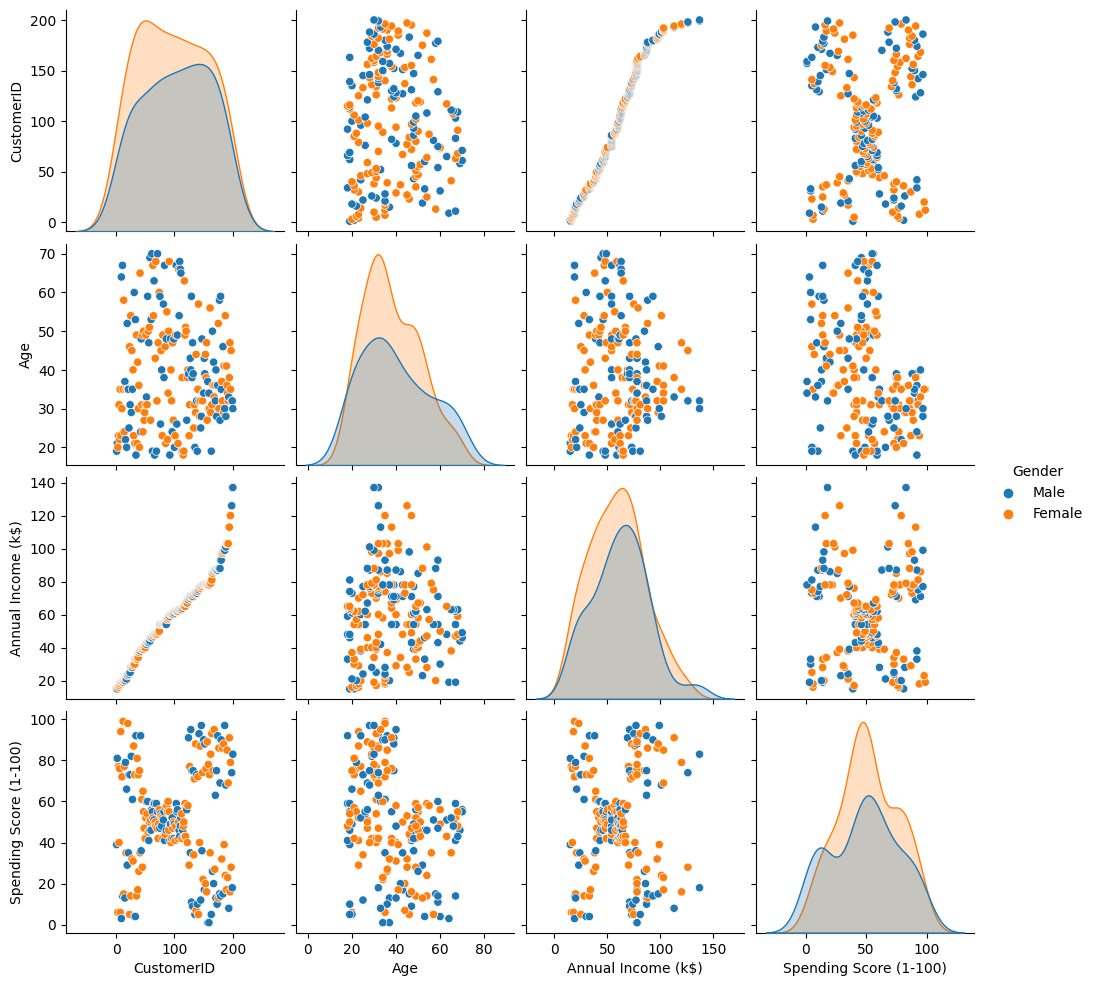

In [46]:
sns.pairplot(df,hue="Gender")

# Regression Models

In [21]:
y = df['Spending Score (1-100)']
X = df.drop(columns = 'Spending Score (1-100)')

In [22]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 45)

In [23]:
# I have one categorical column: Gender(Male, Female)
# I need to convert it into numeric.
# Using LabelEncoder()

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

X_train['Gender'] = labelencoder.fit_transform(X_train['Gender'])
X_test['Gender'] = labelencoder.fit_transform(X_test['Gender'])

In [24]:
X_train.head()

,CustomerID,Gender,Age,Annual Income (k$)
97,98,0,27,60
174,175,0,52,88
138,139,1,19,74
67,68,0,68,48
175,176,0,30,88


In [25]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)
linear_reg_pred= linear_regression.predict(X_test)

linear_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_mae

21.314590663085323

In [26]:
# Mean Absolute Error is 21.16 which is a big number relative to out target variable.
# I can use StandardScaler to improve our model.

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scaled_X_train = pd.DataFrame(std_scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
scaled_X_test = pd.DataFrame(std_scaler.fit_transform(X_test), columns = X_test.columns, index = X_test.index)


In [27]:
# Linear Regression on Standardized Data
linear_regression.fit(scaled_X_train, y_train)
scaled_linear_reg_pred= linear_regression.predict(scaled_X_test)

scaled_linear_mae = mean_absolute_error(y_test, scaled_linear_reg_pred)
scaled_linear_mae

21.074390659567857

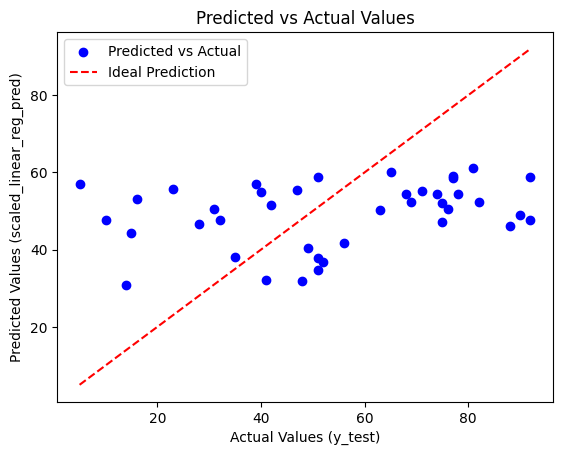

In [28]:
# Visualizing the best fit line

# Plot actual values against predicted values
plt.scatter(y_test, scaled_linear_reg_pred, color='blue', label='Predicted vs Actual')  # Scatter plot

# Plot a 45-degree line for reference (ideal predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction')

plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (scaled_linear_reg_pred)')
plt.legend()
plt.show()

In [29]:
# Non-Linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a pipeline for polynomial regression
degree = 2  # Choose the degree of the polynomial
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Predict
y_pred_poly = poly_model.predict(X_test)

# mae
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_mae

21.041631834491238

In [30]:
# Ridge and Lasso Regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Define a range of alpha values to test
alpha_values = np.logspace(-4, 4, 100)  # From 0.0001 to 10000, for example
ridge_maes = []
lasso_maes = []

# Loop through each alpha value for Ridge
for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    ridge_maes.append(mean_absolute_error(y_test, y_pred_ridge))

# Loop through each alpha value for Lasso
for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    lasso_maes.append(mean_absolute_error(y_test, y_pred_lasso))

# Find the best alpha for Ridge
best_ridge_alpha = alpha_values[np.argmin(ridge_maes)]
best_ridge_mae = min(ridge_maes)

# Find the best alpha for Lasso
best_lasso_alpha = alpha_values[np.argmin(lasso_maes)]
best_lasso_mae = min(lasso_maes)

print(f'Best Ridge Alpha: {best_ridge_alpha}, MAE: {best_ridge_mae}')
print(f'Best Lasso Alpha: {best_lasso_alpha}, MAE: {best_lasso_mae}')


Best Ridge Alpha: 10000.0, MAE: 20.38857480066674
Best Lasso Alpha: 10.235310218990268, MAE: 20.207336056210913


In [31]:
# Support Vector Machine SVR = Support Vector Regression
from sklearn import svm
svm_model = svm.SVR()
svm_model.fit(scaled_X_train, y_train)
svm_pred = svm_model.predict(scaled_X_test)

svm_mae = mean_absolute_error(y_test, svm_pred)
svm_mae

20.83826508685175

In [32]:
# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

dt_model.fit(scaled_X_train, y_train)
dt_pred = dt_model.predict(scaled_X_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mae

21.775

In [33]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(scaled_X_train, y_train)
rf_pred = rf_model.predict(scaled_X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mae # = 15.675
# Till now, best performing model

15.9215

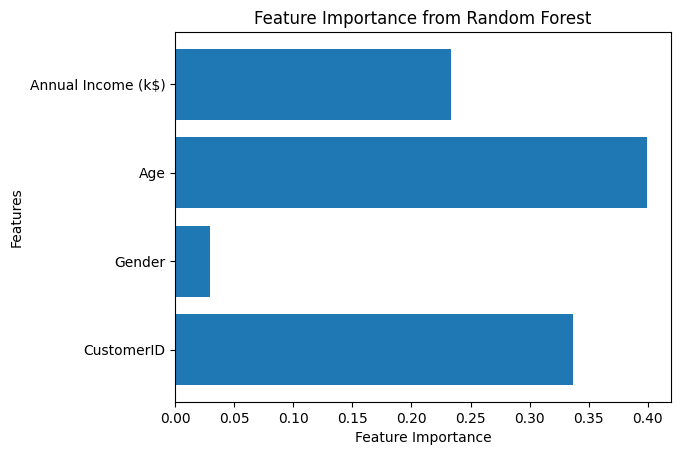

In [34]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

In [42]:
# Now, make best use of RandomForestRegressor using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5,10, 20],
    'min_samples_split':[2,5,10]
}
grid_search = GridSearchCV(estimator = rf_model, param_grid=param_grid, cv=5)
grid_search.fit(scaled_X_train, y_train)
best_rf_model = grid_search.best_estimator_
best_rf_params = grid_search.best_params_


In [43]:
def evaluate_model(model, scaled_X_test, y_test):
    rf_pred2 = model.predict(scaled_X_test)
    mae = mean_absolute_error(y_test, rf_pred2)
    mse = mean_squared_error(y_test, rf_pred2)
    r2 = r2_score(y_test, rf_pred2)
    return mae, mse, r2

print("Best Random Forest Parameters:", best_rf_params)
mae, mse, r2 = evaluate_model(best_rf_model, scaled_X_test, y_test)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Mean Absolute Error: 15.333657889332883
Mean Squared Error: 435.4394695405548
R-squared: 0.27290348741243964


In [ ]:
# As of now, minimum MAE = approx 15

Mean Squared Error: 503.05405, R-squared: 0.16000070966469382


Cross-Validation Scores: [0.55932247 0.23724097 0.06065329 0.15801986 0.49992752]
